# The Spark foundation #GRIPJULY21
## Task 2 Prediction using Unsupervised ML
## Problem statement:
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
##  By Chirag Jain

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

## Dataset : https://bit.ly/3kXTdox
## we can also use dataset from the given dataset link

## scikit-learn  and seaborn both comes with a few small standard datasets that do not require to download any file from some external website.

In [2]:
df = sns.load_dataset("iris")
# sklearn builtin datasets
#from sklearn import datasets
#iris = datasets.load_iris()
#df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## checking if dataset contains any null values

In [6]:
df.isnull().values.any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot:>

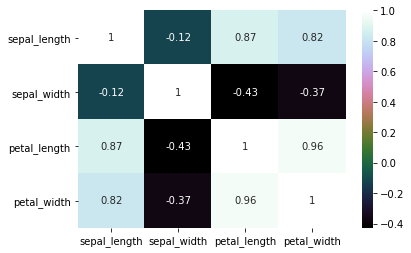

In [9]:
sns.heatmap(df.iloc[:,:-1].corr(),annot=True,cmap='cubehelix')

# Using the Elbow method for the finding the optimal number of clusters

In [10]:
cluster_range=range(1,11)
cluster_errors = [] # list for storing the inertia
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,random_state=0)
    clusters.fit(df.iloc[:,:-1])
    cluster_errors.append(clusters.inertia_) # abppending the inertia/within cluster sum of square

In [11]:
cluster_errors

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.47223015873018,
 39.03998724608725,
 34.299712121212146,
 30.063110617452732,
 28.27172172856384,
 26.094324740540422]

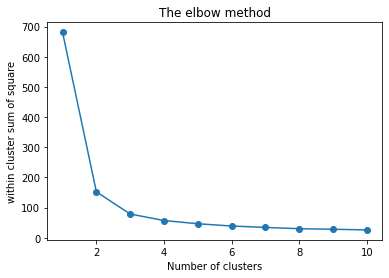

In [12]:
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within cluster sum of square') 
plt.show()

# from the above elbow method we can clearly see that the optimal number of clusters will be "3" for the k means clustering

In [13]:
clusters=KMeans(3)
#by default the init argument of KMeans is 'k-means++ ',max_iter is set as 300 ,random_state is set as None 
# and n_clusters is 8
clusters.fit(df.iloc[:,:-1])

KMeans(n_clusters=3)

In [14]:
clusters.labels_ #the classes/labels for each row  

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [15]:
df['clusterid']=clusters.labels_

In [16]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,clusterid
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,0


In [17]:
x = df.iloc[:, [0, 1, 2, 3]].values

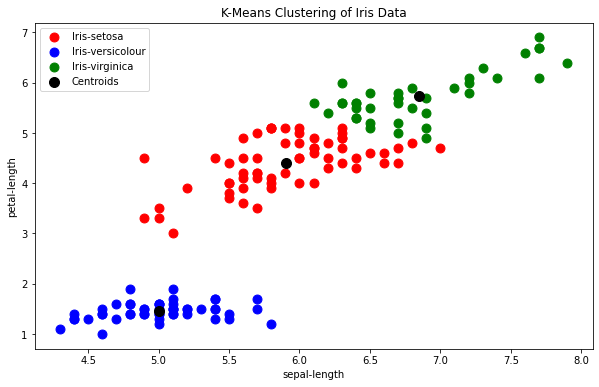

In [18]:
# Visualising the clusters - 
plt.figure(figsize=(10,6))
plt.scatter(x[df.clusterid == 0, 0], x[df.clusterid == 0, 2], 
            s = 80, c = 'red', label = 'Iris-setosa')
plt.scatter(x[df.clusterid == 1, 0], x[df.clusterid == 1, 2], 
            s = 80, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[df.clusterid == 2, 0], x[df.clusterid == 2, 2],
            s = 80, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:,2], 
            s = 100, c = 'black', label = 'Centroids')
plt.xlabel('sepal-length')
plt.ylabel('petal-length')
plt.title('K-Means Clustering of Iris Data')
plt.legend()
plt.show()